In [2]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import functions.handy_functions as hf
from functions.parse_data import synth_dataloader


2024-04-15 13:42:22.744535: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-15 13:42:22.779225: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 13:42:22.779252: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 13:42:22.780090: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-15 13:42:22.786286: I tensorflow/core/platform/cpu_feature_guar

In [3]:
#Read data and name columns
df = synth_dataloader(drop_cols=False)
#Dumb down surfaces
df=hf.dumb_down_surface(df)
df.head(10)



,Cloud_B01,Cloud_B02,Cloud_B03,Cloud_B04,Cloud_B05,Cloud_B06,Cloud_B07,Cloud_B08,Cloud_B08A,Cloud_B09,...,Sat_Zenith_Angle,Sun_Zenith_Angle,Azimuth_Diff_Angle,COT,Cloud_Type,Profile_ID,GOT,Water_Vapor,Surface_Desc,Surface_Desc_Dumb
0,0.61359,0.89822,0.82430,0.84322,0.75232,0.79863,0.86702,0.75245,0.91433,0.38607,...,4.35,56.99,22.96,23.397,2,8973,0.129,6.37,water-snow-finegranular,water
1,0.20905,0.29968,0.27558,0.37609,0.27122,0.48121,0.90663,0.86953,0.91666,0.40817,...,12.27,60.32,81.41,2.452,2,3598,0.123,0.46,vegetation-shrub-ceanothus,vegetation
2,0.33639,0.37579,0.39177,0.55448,0.47159,0.79124,0.93204,0.88240,0.94466,0.37695,...,2.12,55.76,50.24,6.564,5,9625,0.122,0.69,nonphotosyntheticvegetation-flowers-calocedrus,nonphotosyntheticvegetation
3,0.71806,0.73411,0.70360,0.76401,0.74330,0.80824,0.99764,0.89247,1.03605,0.41092,...,1.46,44.21,106.95,29.710,3,6165,0.128,2.96,vegetation-tree-podocarpus,vegetation
4,0.60382,0.61763,0.60034,0.65471,0.70713,0.73157,0.75289,0.76990,0.79839,0.66608,...,12.33,40.58,172.91,17.975,4,2862,0.105,0.10,soil-inceptisol-xerumbrept,soil
5,0.39951,0.44269,0.41916,0.48508,0.41187,0.55872,1.06146,0.96138,1.08698,0.17364,...,6.68,37.10,34.41,8.038,5,5511,0.128,2.21,vegetation-tree-casimiroa,vegetation
6,0.39926,0.41018,0.33676,0.38825,0.35841,0.47554,0.62465,0.58582,0.63424,0.24197,...,5.25,79.20,178.70,10.586,5,4083,0.124,1.15,vegetation-tree-podocarpus,vegetation
7,0.26646,0.42340,0.41368,0.57472,0.40792,0.73594,0.95345,0.80668,0.99948,0.13464,...,5.69,47.20,152.81,4.880,5,5923,0.128,4.09,vegetation-shrub-ceanothus,vegetation
8,0.38524,0.66039,0.51186,0.56628,0.57571,0.59889,0.61139,0.57479,0.62094,0.17041,...,14.72,82.55,136.21,6.280,4,1603,0.126,0.68,rock-sedimentary-chemicalprecipitate,rock
9,0.56497,0.56614,0.51117,0.56691,0.51049,0.61725,0.75113,0.64290,0.78767,0.11356,...,0.31,69.07,121.27,20.479,4,8279,0.123,5.44,vegetation-shrub-agave,vegetation


In [4]:
print(np.unique(df['Surface_Desc'].to_numpy(), return_counts=True))
#Find tapwater 
water_df = df[df['Surface_Desc']=='water-tapwater-none']
water_df.shape


(array(['nonphotosyntheticvegetation-bark-abies',
       'nonphotosyntheticvegetation-bark-acer',
       'nonphotosyntheticvegetation-bark-betula',
       'nonphotosyntheticvegetation-bark-calocedrus',
       'nonphotosyntheticvegetation-bark-pinus',
       'nonphotosyntheticvegetation-bark-quercus',
       'nonphotosyntheticvegetation-branches-adenostoma',
       'nonphotosyntheticvegetation-branches-ceanothus',
       'nonphotosyntheticvegetation-branches-foeniculum',
       'nonphotosyntheticvegetation-branches-salvia',
       'nonphotosyntheticvegetation-flowers-calocedrus',
       'nonphotosyntheticvegetation-leaves-avena',
       'nonphotosyntheticvegetation-leaves-none',
       'nonphotosyntheticvegetation-leaves-quercus',
       'nonphotosyntheticvegetation-lichen-lichen',
       'nonphotosyntheticvegetation-needles-abies',
       'nonphotosyntheticvegetation-needles-pinus',
       'rock-igneous-alkalic', 'rock-igneous-basic',
       'rock-igneous-felsic', 'rock-igneous-feslic'

(1898, 36)

In [5]:
clearcols = ['Clear_B02','Clear_B03','Clear_B04','Clear_B05','Clear_B06',
             'Clear_B07','Clear_B08','Clear_B08A','Clear_B09','Clear_B10','Clear_B11','Clear_B12']
cloudcols = ['Cloud_B02','Cloud_B03','Cloud_B04','Cloud_B05','Cloud_B06',
             'Cloud_B07','Cloud_B08','Cloud_B08A','Cloud_B09','Cloud_B10','Cloud_B11','Cloud_B12']

In [8]:

print(np.mean(df[cloudcols].to_numpy(),axis=0))
print(np.mean(df['Sun_Zenith_Angle']))
print(np.std(df[cloudcols].to_numpy(),axis=0))
print(np.std(df['Sun_Zenith_Angle']))

[0.5159022  0.48930507 0.57624751 0.54434123 0.66352627 0.93152929
 0.89793559 0.98973655 0.4456635  0.07007362 0.50300405 0.40412671]
58.0061154
[0.27741833 0.27350627 0.28171366 0.30964284 0.27881009 0.31931352
 0.32986593 0.36227525 0.28535278 0.10695668 0.41583674 0.32312217]
15.556165358432096


water: 200000 = 100.0%
with std: 0.1657726372126607


ValueError: x and y must be the same size

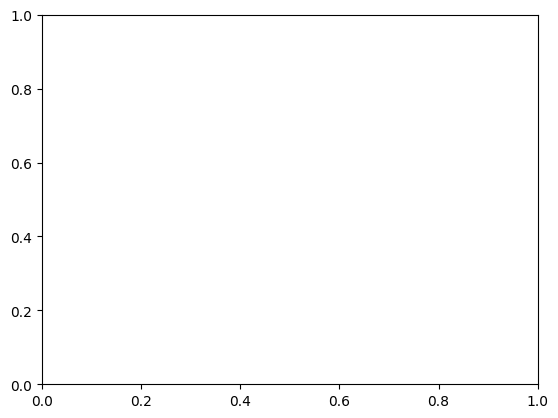

In [4]:
#Find mean of all clear data
means = np.mean(np.array(df[clearcols]),axis=0)
#Find rates of each surf type
surfs_all=np.array(df['Surface_Desc_Dumb'])
unique_surf, count_surf = np.unique(surfs_all, return_counts=True)

#Find stds, and deviations from average, of each surf type
surf_devs=np.zeros([len(unique_surf),len(clearcols)])
for i in range(len(unique_surf)):
    print(unique_surf[i]+': '+str(count_surf[i])+' = '+str(count_surf[i]/2000)+'%')
    surf_data = np.array(df[df['Surface_Desc_Dumb']==unique_surf[i]][clearcols])
    std = np.mean(np.std(surf_data,axis=0))
    print('with std: '+str(std))
    surf_devs[i,:] = np.mean(np.abs(np.array(df[df['Surface_Desc_Dumb']==unique_surf[i]][clearcols])-means),axis=0)
    
#Print deviations
x=np.arange(len(clearcols))
plt.figure()
plt.scatter(x,surf_devs[unique_surf=='vegetation',:])
plt.scatter(x,surf_devs[unique_surf=='rock',:])
plt.scatter(x,surf_devs[unique_surf=='nonphotosyntheticvegetation',:])
plt.scatter(x,surf_devs[unique_surf=='water',:])
plt.scatter(x,surf_devs[unique_surf=='soil',:])

plt.xticks(x, ['B02','B03','B04','B05','B06','B07','B08','B8A','B09','B10','B11','B12'])
plt.title('Average deviation of each surface type by frequency band')
plt.xlabel('Frequency band')
plt.ylabel('Reflectivity')
plt.legend(['Vegetation','Rock','Non-phot. veg.','Water','Soil'],loc='upper left')
ax = plt.gca()
ax.set_ylim([0, 0.7])
plt.show()


In [5]:
#Find total amount of surface types
unique_surf_all, count_surf_all = np.unique(np.array(df['Surface_Desc']), return_counts=True)
print(len(unique_surf_all))

139


0: 50000 = 25.0% with mean COT:0.0
1: 9985 = 4.9925% with mean COT:14.261318177265897
2: 9967 = 4.9835% with mean COT:9.595307916123208
3: 10130 = 5.065% with mean COT:18.289357255676208
4: 9859 = 4.9295% with mean COT:24.145905974236737
5: 10059 = 5.0295% with mean COT:8.52705964807635
6: 50000 = 25.0% with mean COT:17.15234794
7: 50000 = 25.0% with mean COT:26.988614199999994


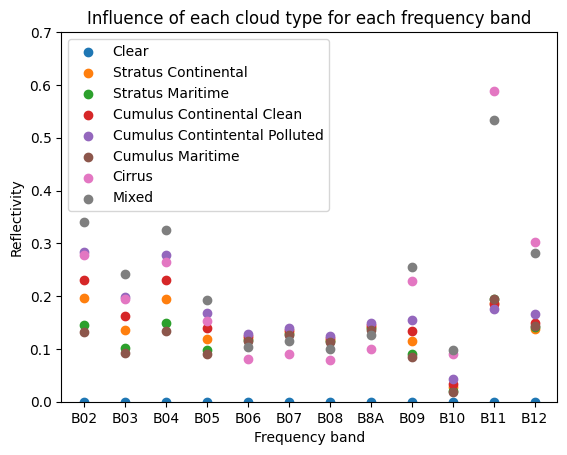

In [18]:
#Find rates of each cloud type, group mixed clouds for clarity
clouds_all=np.array(df['Cloud_Type'])
for i in range(len(clouds_all)):
    if clouds_all[i]>6:
        clouds_all[i]=7
unique_cloud, count_cloud = np.unique(clouds_all, return_counts=True)

#Find influence and COT of each surf type
cloud_inf = np.zeros([len(unique_cloud), len(clearcols)])
for i in range(len(unique_cloud)):
    cloud_data = np.array(df[clouds_all == unique_cloud[i]][cloudcols])-np.array(df[clouds_all == unique_cloud[i]][clearcols])
    cloud_inf[i,:] = np.mean(np.abs(cloud_data),axis=0)
    cloud_COT = np.mean(np.array(df[clouds_all == unique_cloud[i]]['COT']))

    print(str(unique_cloud[i])+': '+str(count_cloud[i])+' = '+str(count_cloud[i]/2000)+'%'+' with mean COT:'+str(cloud_COT))

plt.figure()
for i in range(len(unique_cloud)):
    plt.scatter(x,cloud_inf[i,:])

plt.xticks(x, ['B02','B03','B04','B05','B06','B07','B08','B8A','B09','B10','B11','B12'])
plt.title('Influence of each cloud type for each frequency band')
plt.xlabel('Frequency band')
plt.ylabel('Reflectivity')
plt.legend(['Clear','Stratus Continental','Stratus Maritime','Cumulus Continental Clean','Cumulus Contintental Polluted','Cumulus Maritime','Cirrus','Mixed'],loc='upper left')
ax = plt.gca()
ax.set_ylim([0, 0.7])
plt.show()